<a href="https://colab.research.google.com/github/ahmetalperenvar/RNN-LSTM_with_imdb/blob/main/RNN_LSTM_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Load the IMDB dataset
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to a maximum length
max_len = 200
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 1s 0us/step


# RNN

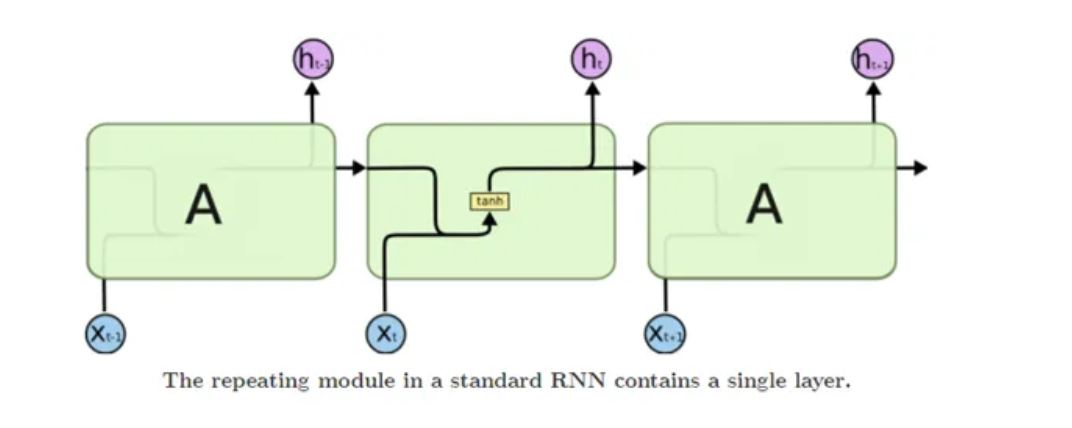

In [ ]:


# Define the RNN model
rnn_model = keras.Sequential([
    keras.layers.Embedding(10000, 32, input_length=max_len),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
])


# LSTM

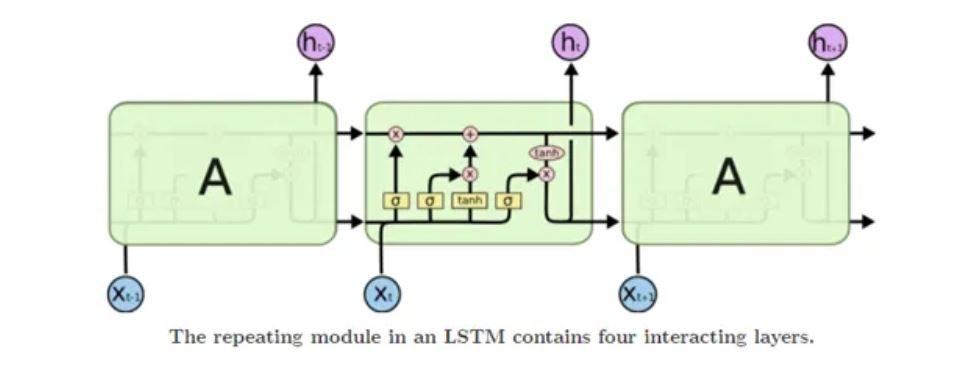

In [ ]:
# Define the LSTM model
lstm_model = keras.Sequential([
    keras.layers.Embedding(10000, 32, input_length=max_len),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile both models
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8, batch_size=128)

# Train the LSTM model
lstm_history = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8, batch_size=128)

Epoch 1/8
196/196 [==============================] - 72s 361ms/step - loss: 0.6420 - accuracy: 0.6218 - val_loss: 0.6342 - val_accuracy: 0.6153
Epoch 2/8
196/196 [==============================] - 70s 357ms/step - loss: 0.4711 - accuracy: 0.7750 - val_loss: 0.5438 - val_accuracy: 0.7180
Epoch 3/8
196/196 [==============================] - 71s 365ms/step - loss: 0.3665 - accuracy: 0.8427 - val_loss: 0.3993 - val_accuracy: 0.8298
Epoch 4/8
196/196 [==============================] - 70s 360ms/step - loss: 0.2901 - accuracy: 0.8828 - val_loss: 0.4747 - val_accuracy: 0.7745
Epoch 5/8
196/196 [==============================] - 70s 355ms/step - loss: 0.4908 - accuracy: 0.7978 - val_loss: 0.4296 - val_accuracy: 0.8126
Epoch 6/8
196/196 [==============================] - 72s 369ms/step - loss: 0.3334 - accuracy: 0.8631 - val_loss: 0.4320 - val_accuracy: 0.8220
Epoch 7/8
196/196 [==============================] - 71s 365ms/step - loss: 0.2617 - accuracy: 0.8994 - val_loss: 0.4474 - val_accuracy:

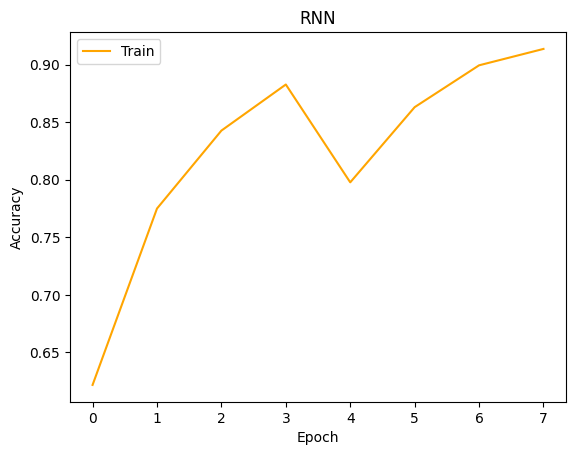

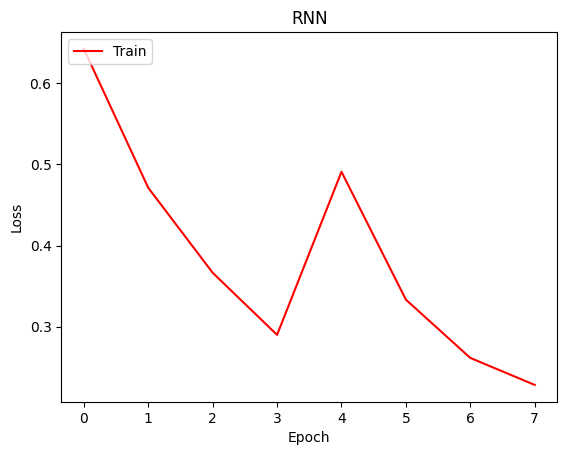

In [ ]:
# Plot training & validation accuracy values
plt.plot(rnn_history.history['accuracy'],color='orange')
plt.title('RNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(rnn_history.history['loss'],color ='red')
plt.title('RNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

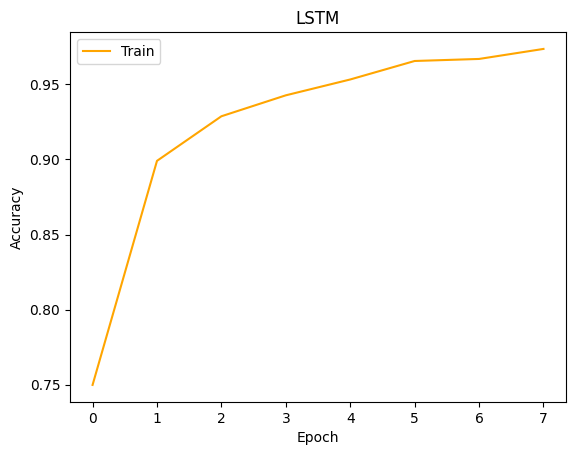

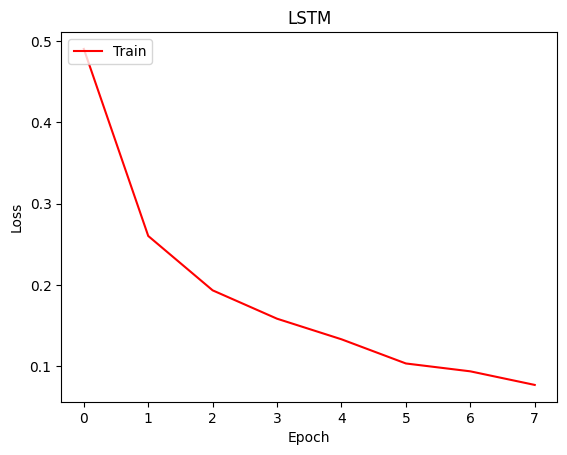

In [ ]:
# Plot training & validation accuracy values
plt.plot(lstm_history.history['accuracy'],color='orange')
plt.title('LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(lstm_history.history['loss'],color ='red')
plt.title('LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
rnn_score = rnn_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", rnn_score[0])
print("Test accuracy:", rnn_score[1])

Test loss: 0.45025309920310974
Test accuracy: 0.8007199764251709


In [ ]:
lstm_score = lstm_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", lstm_score[0])
print("Test accuracy:", lstm_score[1])

Test loss: 0.4644281566143036
Test accuracy: 0.8384799957275391


# As we can see when we look at training accuracy and test accuracy we are facing with overfitting. We need to apply some technique to avoid overfitting such as dropout.

In [ ]:
# Define the RNN model
rnn_model = keras.Sequential([
    keras.layers.Embedding(10000, 32, input_length=max_len),
    keras.layers.SimpleRNN(128,recurrent_dropout=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define the LSTM model with recurrent dropout
lstm_model = keras.Sequential([
    keras.layers.Embedding(10000, 32, input_length=max_len),
    keras.layers.LSTM(128, recurrent_dropout=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile both models
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128)

# Train the LSTM model
lstm_history = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128)

Epoch 1/4
196/196 [==============================] - 91s 454ms/step - loss: 0.7100 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 2/4
196/196 [==============================] - 92s 471ms/step - loss: 0.6971 - accuracy: 0.5150 - val_loss: 0.6885 - val_accuracy: 0.5323
Epoch 3/4
196/196 [==============================] - 87s 443ms/step - loss: 0.6898 - accuracy: 0.5305 - val_loss: 0.6826 - val_accuracy: 0.5336
Epoch 4/4
196/196 [==============================] - 92s 467ms/step - loss: 0.6723 - accuracy: 0.5664 - val_loss: 0.6555 - val_accuracy: 0.6054
Epoch 1/4
196/196 [==============================] - 318s 2s/step - loss: 0.5463 - accuracy: 0.6995 - val_loss: 0.3485 - val_accuracy: 0.8525
Epoch 2/4
196/196 [==============================] - 342s 2s/step - loss: 0.2692 - accuracy: 0.8937 - val_loss: 0.3264 - val_accuracy: 0.8716
Epoch 3/4
196/196 [==============================] - 343s 2s/step - loss: 0.1973 - accuracy: 0.9264 - val_loss: 0.4378 - val_accuracy: 0.854

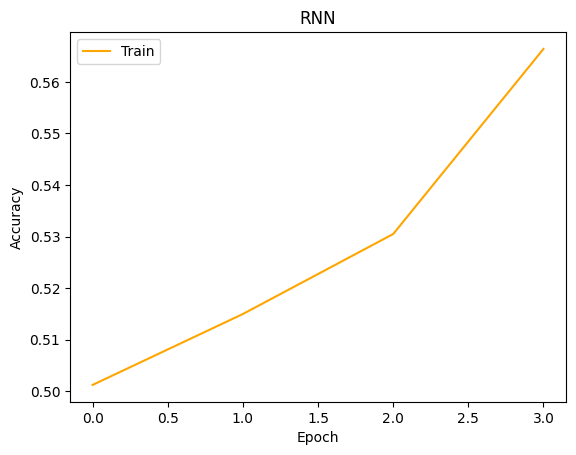

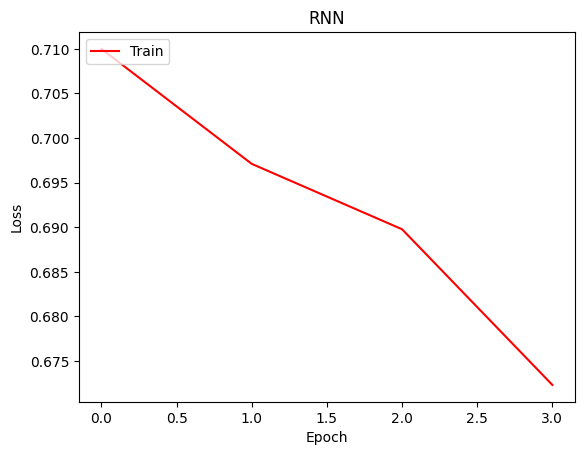

In [ ]:
# Plot training & validation accuracy values
plt.plot(rnn_history.history['accuracy'],color='orange')
plt.title('RNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(rnn_history.history['loss'],color ='red')
plt.title('RNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

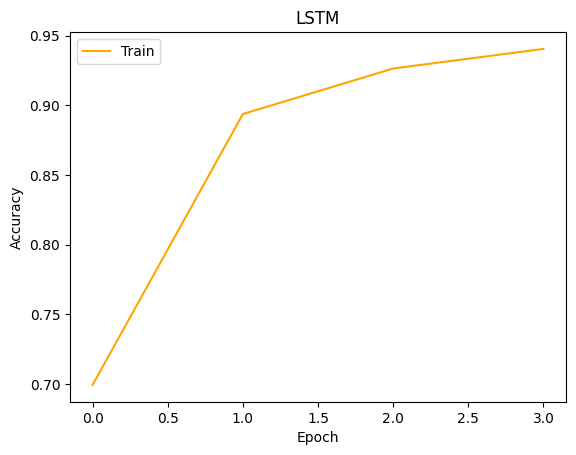

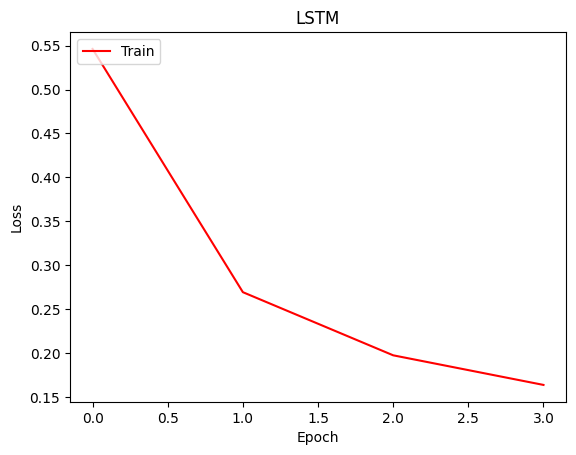

In [ ]:
# Plot training & validation accuracy values
plt.plot(lstm_history.history['accuracy'],color='orange')
plt.title('LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(lstm_history.history['loss'],color ='red')
plt.title('LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
rnn_score = rnn_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", rnn_score[0])
print("Test accuracy:", rnn_score[1])

Test loss: 0.6554533839225769
Test accuracy: 0.605400025844574


In [ ]:
lstm_score = lstm_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", lstm_score[0])
print("Test accuracy:", lstm_score[1])

Test loss: 0.338570773601532
Test accuracy: 0.8667600154876709
